 
 - https://www.kaggle.com/themlphdstudent/cheat-sheet-seaborn-charts
 - https://seaborn.pydata.org/introduction.html
 - https://seaborn.pydata.org/tutorial.html
 - https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
 - https://medium.com/@neuralnets/statistical-data-visualization-series-with-python-and-seaborn-for-data-science-5a73b128851d
 - https://medium.com/@ppeng08/interactive-visualization-for-exploratory-data-analysis-in-jupyter-notebook-adc826e1e76a
 - https://gist.github.com/noklam/ddd503085c5aa0c27ddb0eceb4a2f07b
 - https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
 - https://python.quantecon.org/index_toc.html
 - http://seaborn.pydata.org/tutorial/axis_grids.html
 - http://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
 - https://www.youtube.com/watch?v=KvZ2KSxlWBY 

In [1]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt

# Common datasets

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
iris_df = sns.load_dataset("iris")
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
titanic_df = sns.load_dataset("titanic")
print(titanic_df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
tips_df = sns.load_dataset("tips")
print(tips_df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Style and theme

To activate default theme of seaborn : sns.set_theme()

To activate style : 
```python
sns.set_style("darkgrid")
sns.set_style("whitegrid")
sns.set_style("dark")
sns.set_style("white")
sns.set_style("ticks")
```

To set context : 
```python
sns.set_context("paper")
sns.set_context("notebook")
sns.set_context("talk")
sns.set_context("poster")
```

In [6]:
sns.set_theme()
sns.set_style("darkgrid")

To remove top and right axes spines : sns.despine()
```python
sns.despine(offset=10, trim=True);
sns.despine(left=True)
```

Style can be used in context : 
```python
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()
```

Palettes :

 - pastel
 - magma
 - ch:.25
 - ch:0.95
 - Set2

In [ ]:
sns.set_style('ticks', {'axes.grid': True, 'xtick.direction': 'in'})
sinplot()
sns.despine(left = True, bottom= False)

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})

# Quick plots

High level categorical plot : `catplot()`
 - scatter


Categorical scatter 
 - `stripplot` : `catplot(kind="strip")`
 - `swarmplot` : `catplot(kind="swarm")`
 
Categorical distribution plots:
 - `boxplot()` : `kind="box`
 - `violinplot()` : `kind="violin"`
 - `boxenplot()` :  `kind="boxen"`
 
Categorical estimate plots:
 - `pointplot()` : `kind="point"`
 - `barplot()` : `kind="bar"`
 - `countplot()` : `kind="count"`

# Plots

## sns.barplot

In [11]:
fig, ax = plt.subplots()
sns.barplot(data=iris_df, 
            x='species', 
            y='sepal_length', 
            hue="species",
            ci=95,
            dodge=False,
            #palette='magma',
            #orient='h'
            color="#1CB3B1", # main color, exclusive with palette
           )


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

## sns.catplot(kind="strip")

In [12]:
sns.catplot(kind="strip", data=iris_df,
            x="species",
            y="petal_width",
            hue="species",
            jitter=True,
            split=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


## sns.catplot(kind="swarm")

In [14]:
sns.catplot(kind="swarm", data=iris_df,
            x="species", 
            y="petal_width",
            hue="species")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


## sns.catplot(kind="box")

In [15]:
sns.catplot(kind="box", data=iris_df,
            x="species",
            y="petal_width", 
            hue="species",
            color = '#EE67CF' # main color
           )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.catplot(kind="violin")

In [16]:
sns.catplot(kind="violin", data=iris_df,
            x="species", 
            y="petal_width",
            hue="species",
            inner="stick",
            split=False,
            palette="pastel")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.catplot(kind="boxen")

In [17]:
sns.catplot(kind="boxen", data=iris_df,
            x="species",
            y="sepal_width")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.catplot(kind="bar")

In [18]:
sns.catplot(kind="bar", data=iris_df,
            x="species", 
            y="petal_width",
            hue="species")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.catplot(kind="count")

In [ ]:
sns.catplot(kind="count", data=df, 
                x=x, 
                palette=palette ,
               )

## sns.catplot(kind="point")

In [21]:
sns.catplot(kind="point", data=iris_df, 
            x="petal_width", 
            y="sepal_width",
            hue="species")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.displot

In [14]:
sns.displot(iris_df, 
            x="petal_length",
            hue="species",
            #col="sex",                   # add additional plots col-wise
            #stat="density",              # normalize hist area
            stat="probability",           # normalise hist values
            common_norm=False,            # normalise each sub-hist independantly
            #bins=20,                     # set bin number
            #bins=[1, 2, 3, 4, 5, 6, 7]), # set bins
            binwidth=0.5,                 # set bin size
            #discrete=True,               # if data values are discrete
            #shrink=.8,                   # shrink bins width-display
            #element="step",              #
            #multiple="stack",            # dodge
            rug=True,                     # add rug
            #color="blue",              # main color
           )

#sns.distplot(data_df['sepal_width'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

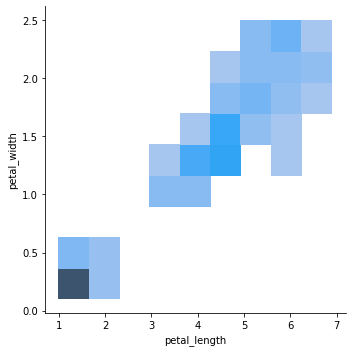

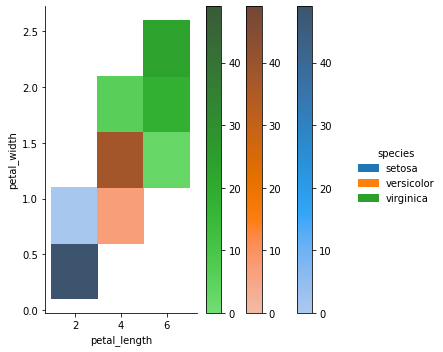

In [64]:
sns.displot(iris_df, 
            x="petal_length", y="petal_width")

sns.displot(iris_df, hue="species",
            x="petal_length", y="petal_width",
           binwidth=(2, .5),
           cbar=True,
           )


## sns.displot(kind="kde")

In [22]:
sns.displot(iris_df, kind="kde",
            hue="species",
            #multiple="stack", 
            fill=True, 
            bw_adjust=.5,      # adjust bandwidth
            #cut=0,            # clip kde plot curve
            x="petal_length",
            y="petal_width",
            #thresh=.2, 
            #levels=0.2,        # levels=[.01, .05, .1, .8]
            rug=True,
           )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
sns.displot(iris_df, kind="kde",
            x="petal_length",
            y="petal_width")

In [ ]:
sns.displot(iris_df, kind="kde", 
            x="sepal_length",
            y="petal_length", 
            hue="species")

## sns.displot(kind="ecdf")

In [24]:
sns.displot(iris_df, kind="ecdf", 
            x="petal_length", 
           hue="species",
           rug=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.heatmap

In [33]:
plt.figure()
sns.heatmap(iris_df.corr(),
            vmin=-1,
            vmax=1,        
            annot=True,             # add cell values on cell
            linewidth=0.5,          # linewidth separating cells
            linecolor="k",          # color of lines separating cells
            cbar=True,              # add a colorbar
            square=True,            # enforce square cells
            #yticklabels=cols,      # list of names for col labels
            #xticklabels=cols,      # list of names for col labels
            annot_kws={'size': 20},
            cmap="BuPu",            # YlGnBu/ Blues / BuPu / Greens
           )   



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

## sns.histplot

In [59]:
fig, ax = plt.subplots()
sns.histplot(data=iris_df,
             x="sepal_length",
             hue="species",
             multiple="stack")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

## sns.lineplot

In [8]:
plt.figure()
sns.lineplot(data=iris_df,
             x='petal_length',
             y='petal_width',
             hue="species",
             style="species",
             markers=True,
    )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

## sns.lmplot

In [28]:
sns.lmplot(data=iris_df,
           x="petal_length", y="petal_width", 
           hue="species",
           #col="species",           # add other plots column-wise
           #col_wrap=2,              # wrap plots 
           #row="sepal_length",      # add other plots row-wise
           #x_estimator=np.mean,     # choose aggregation
           x_jitter=.05,
           #order=2,                 # change the order of regression
           #ci=None,                 # enable confidence interval
           #robust=True,             # exclude outliers from regression
           #logistic=True,           # use logistic curve (usefull for binary data)
           #markers=["o", "x", "*"], # use different markers for hue
           #palette="Set1",          # change color palet
           markers=["o", "x", "+"],
           scatter_kws={"s": 80,       # scatter kwargs
                       # "color":"red"
                       },
          #line_kws={'color': 'red'}   # line kwargs
          ); #

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.jointplot

In [80]:
sns.jointplot(data=iris_df,
              x="petal_length",
              y="sepal_length",
              hue="species")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.jointplot(kind="kde")

In [81]:
sns.jointplot(data=iris_df, kind="kde",
              x="petal_length", 
              y="petal_width",
              hue="species"
    )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.pairplot

In [35]:

sns.pairplot(data=iris_df, 
             kind="reg",             # plot-kind in cross cells : {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             #vars=,
             #x_vars=["sepal_length", "sepal_width", "petal_width"], # restrict variables on xaxis
             #y_vars=["sepal_length", "sepal_width", "sepal_width"], # restrict variables on yaxis
             hue="species",
             diag_kind="kde",            # plot-kind on diagonal cells : "auto", "hist", "kde", None
             height=1.5,                 # height of cell
             aspect=1,                   # width wrt heigth
             palette="Set2",
             corner=True,              # low-left-triangle plots only
             #plot_kws={'color':'green'}
            )#.map_upper(sns.kdeplot, cmap="Blues_d")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.regplot

In [153]:
plt.figure()
sns.regplot(data=iris_df, 
            x="sepal_width",
            y="sepal_length",
            order=1,      # change the order of regression, exclusive with order/logistic/robust/logx
            scatter=True, # plot scatter 
            fit_reg=True,  # plot regression line
            ci=100,        # confidence interval : None to hide
            #robust=True,   # exclude outliers from regression
            #x_jitter=.1   # jitter when x is discrete
            x_estimator=np.mean, # add mean estimator
            #logx=True,     # use log regression, exclusive with order/logistic/robust/logx
            #logistic=False, # use logistic regression (for binary data), exclusive use with order/logistic/robust/logx
           )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

## sns.relplot

In [27]:

sns.relplot(
    data=tips_df, 
    #kind="line", # None for scatter, line
    x="total_bill",
    y="tip",
    col="time",
    row="sex",
    hue="day",
    size="size", 
    height=3,
    aspect=1,
    #style="species",
    #col_wrap=2, 
    facet_kws=dict(sharex=False),
)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## sns.residplot

In [83]:
plt.figure()
# compute regression and plot residuals
sns.residplot(data=iris_df, 
              x="sepal_length",
              y="sepal_width",
              scatter_kws={"s": 80})
 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

## sns.scatterplot

In [24]:
plt.figure()
sns.scatterplot(data=iris_df,
                x='sepal_length',
                y='sepal_width',
                hue="species",
                style="species",
                size="petal_width",  # size of markers
                sizes=(10,300),      # min and max markers sizes
               )


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

# Interactive iris : start here !

In [38]:
%matplotlib ipympl
import seaborn as sns
import pandas as pd
import ipywidgets
import matplotlib.pyplot as plt

iris_df = sns.load_dataset("iris")

# all cols
iris_cols = list(iris_df.columns)
# all cols w None
iris_cols_ext = list(iris_cols)
iris_cols_ext.append(None)
# numerical features
iris_num_cols = list(iris_cols)
iris_num_cols.remove("species")
# numerical features w None
iris_num_cols_ext = list(iris_num_cols)
iris_num_cols_ext.append(None)

## sns.catplot(kind="count")

In [39]:
@ipywidgets.interact
def plot(ys=iris_cols):         
    sns.catplot(kind="count", data=iris_df,
                y=ys)

interactive(children=(Dropdown(description='ys', options=('sepal_length', 'sepal_width', 'petal_length', 'peta…

## sns.catplot(kind="boxplot")

In [40]:
# stripplot plot : univariate counts
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):   
    sns.catplot(kind="box", data=iris_df,
                x=x,
                y=y,
                hue=hue)

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…

## sns.caplot(kind="boxen")

In [41]:
# stripplot plot : univariate counts
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):   
    sns.catplot(kind="boxen", data=iris_df,
                x=x, 
                y=y, hue=hue)

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…

## sns.caplot(kind="point")

In [42]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):
    sns.catplot(kind="point", data=iris_df, 
                x=x,
                y=y, 
                hue=hue)

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…

## sns.caplot(kind="violin")

In [43]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols, col=iris_cols_ext):   
    sns.catplot(kind="violin", data=iris_df,
                x=x,
                y=y,
                hue=hue,
                col=col,
                inner="stick", 
                split=False,      # hue level only
                palette="pastel")

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…

## sns.catplot(kind="strip")

In [44]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):          
        sns.catplot(kind="strip", data=iris_df,
                    x=x,
                    y=y,
                    hue=hue,
                    #jitter=True,
                    dodge=True  # formerly "split"
                   )



interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…

## sns.catplot(kind="swarm")

In [45]:
@ipywidgets.interact
def plot(x=iris_cols, y=iris_cols, hue=iris_cols):   
    #plt.figure()
    sns.catplot(kind="swarm", data=iris_df,
                x=x,
                y=y,
                hue=hue)

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…

## sns.heatmap

In [46]:
@ipywidgets.interact
def plot(cols=ipywidgets.SelectMultiple(options=iris_cols), 
         annot=True, 
         cbar=True, 
         square=True):   
    fig, ax = plt.subplots()
    cols = list(cols)
    if len(cols) == 0:
        cols = list(iris_cols)
    sns.heatmap(iris_df[cols].corr(),
                vmin=-1,
                vmax=1,
                annot=annot,
                linewidth=0.5, # linewidth separating cells
                linecolor="k", # color of lines separating cells
                cbar=cbar,    # add a colorbar
                square=square # enforce square cells
        )
    plt.tight_layout()


interactive(children=(SelectMultiple(description='cols', options=('sepal_length', 'sepal_width', 'petal_length…

## sns.histplot

In [47]:

numerical_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

@ipywidgets.interact
def plot(hue=iris_cols, 
         x=iris_cols,
         stat=["count", "frequency", "density", "probability"]):
    fig, ax = plt.subplots()
    sns.histplot(
        data=iris_df,
        x=x, 
        stat=stat,         # "count", "frequency", "density", "probability"
        # y=ys,
        hue=hue,
        discrete=False,
        cumulative=False,
        fill=False,
        kde=True,
        multiple="layer",   # {“layer”, “dodge”, “stack”, “fill”}
        element="bars",      # {"bars", "step", "poly"—
        cbar=True,
    )

interactive(children=(Dropdown(description='hue', options=('sepal_length', 'sepal_width', 'petal_length', 'pet…

## sns.pairplot 

In [48]:

@ipywidgets.interact
def plot(hue=iris_cols_ext, diag_kind=["auto", "hist", "kde", None], 
         kind=["scatter", "kde", "hist", "reg"],
        corner=False):
    sns.pairplot(data=iris_df, 
             kind=kind,                              #plot-kind in cross cells : {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
             #vars=,
             x_vars=iris_num_cols, # restrict variables on xaxis
             y_vars=iris_num_cols, # restrict variables on yaxis
             hue=hue,
             diag_kind=diag_kind,                    # plot-kind on diagonal cells : "auto", "hist", "kde", None
             height=1.5,                               # height of cell
             aspect=1,                               # width wrt heigth
             palette="Set2",
             corner=corner,    # low-left-triangle plots only : True/false
            )


interactive(children=(Dropdown(description='hue', options=('sepal_length', 'sepal_width', 'petal_length', 'pet…

## sns.regplot

In [49]:


import numpy as np

numerical_cols

@ipywidgets.interact
def plot(x=numerical_cols, y=numerical_cols, fit_reg=True, scatter=True, x_estimator=[None, np.mean]):
    plt.figure()
    sns.regplot(data=iris_df, 
            x=x, y=y,
            order=1,      # change the order of regression, exclusive with order/logistic/robust/logx
            scatter=scatter, # plot scatter 
            fit_reg=fit_reg,  # plot regression line
            ci=100,        # confidence interval : None to hide
            x_bins=None,     # number of x bins for plotting, int or None
            #robust=True,   # exclude outliers from regression
            #x_jitter=.1   # jitter when x is discrete
            x_estimator=x_estimator, # add mean estimator : None or callable(vector)->scalar
            #logx=True,     # use log regression, exclusive with order/logistic/robust/logx
            #logistic=False, # use logistic regression (for binary data), exclusive use with order/logistic/robust/logx
           )

interactive(children=(Dropdown(description='x', options=('sepal_length', 'sepal_width', 'petal_length', 'petal…